In [1]:
from bsread import source, SUB, PULL, PUSH, PUB
import matplotlib.pyplot as plt
import numpy as np

In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#from cam_server.utils import get_host_port_from_stream_address

port=9003
host = "sf-daqsync-03.psi.ch"
mode = SUB
num_shots = 1000
x_corr = []
x_corr_amp = []
signal = []
raw_wf = []
raw_wf_savgol = []
dark_wf = []
avg_dark_wf = []
att = []
edge_pos = []
with source(host=host, port=port, mode=SUB) as stream:
    for i in range(0,num_shots):
        message = stream.receive()
        if i == 0:
            print(message.data.data.keys())
        x_corr.append(message.data.data['SAROP21-ATT01:xcorr'].value)
        x_corr_amp.append(message.data.data['SAROP21-ATT01:xcorr_ampl'].value) 
        signal.append(message.data.data['SAROP21-ATT01:signal'].value)
        att.append(message.data.data['SAROP21-ATT01:arrival_time'].value)
        edge_pos.append(message.data.data['SAROP21-ATT01:edge_pos'].value)
        raw_wf.append(message.data.data['SAROP21-ATT01:raw_wf'].value)
        raw_wf_savgol.append(message.data.data['SAROP21-ATT01:raw_wf_nosavgol'].value)
        dark_wf.append(message.data.data['SAROP21-ATT01:dark_wf'].value)
        
x_corr = np.asarray(x_corr)        

odict_keys(['SAROP21-ATT01:edge_pos', 'SAROP21-ATT01:xcorr', 'SAROP21-ATT01:xcorr_ampl', 'SAROP21-ATT01:signal', 'SAROP21-ATT01:arrival_time', 'SAROP21-ATT01:raw_wf_nosavgol', 'SAROP21-ATT01:raw_wf', 'SAROP21-ATT01:dark_wf_nosavgol', 'SAROP21-ATT01:dark_wf', 'SAROP21-ATT01:avg_dark_wf_nosavgol', 'SAROP21-ATT01:avg_dark_wf'])


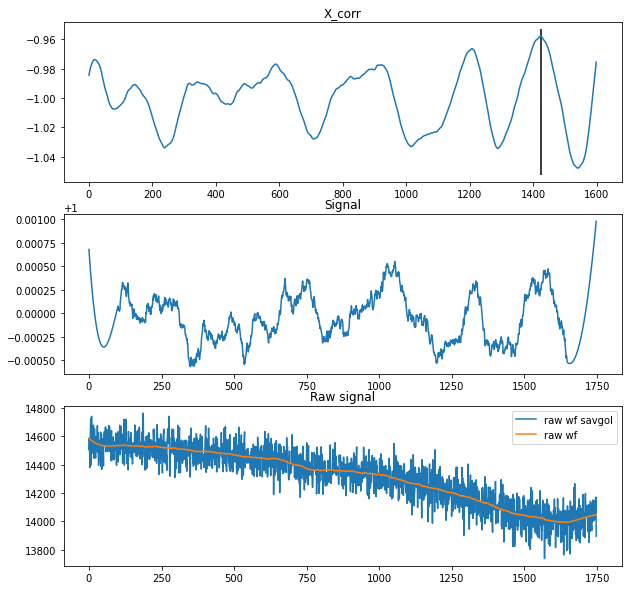

In [11]:
ind = 25
plt.figure(figsize=[10,10])
plt.subplot(311)
plt.title('X_corr')
plt.plot(x_corr[ind])
lims = plt.gca().get_ylim()
plt.vlines(edge_pos[ind], lims[0],lims[1])
plt.subplot(312)
plt.title('Signal')
plt.plot(signal[ind])
plt.subplot(313)
plt.title('Raw signal')
plt.plot(raw_wf_savgol[ind], label = 'raw wf savgol')
plt.plot(raw_wf[ind], label = 'raw wf')
plt.legend()

(array([1., 4., 2., 0., 2., 3., 0., 2., 2., 3., 1., 5., 3., 2., 4., 3., 2.,
        3., 1., 4., 4., 2., 5., 0., 0., 2., 2., 4., 0., 2., 4., 4., 2., 6.,
        4., 1., 2., 6., 1., 4., 4., 1., 1., 3., 7., 2., 2., 2., 0., 4., 1.,
        2., 1., 4., 3., 2., 1., 1., 2., 0., 1., 4., 0., 1., 1., 0., 1., 4.,
        1., 1., 1., 3., 1., 2., 1., 2., 2., 1., 1., 1., 2., 0., 3., 1., 1.,
        1., 2., 2., 3., 1., 3., 3., 1., 2., 1., 0., 1., 2., 0.]),
 array([200.        , 206.06060606, 212.12121212, 218.18181818,
        224.24242424, 230.3030303 , 236.36363636, 242.42424242,
        248.48484848, 254.54545455, 260.60606061, 266.66666667,
        272.72727273, 278.78787879, 284.84848485, 290.90909091,
        296.96969697, 303.03030303, 309.09090909, 315.15151515,
        321.21212121, 327.27272727, 333.33333333, 339.39393939,
        345.45454545, 351.51515152, 357.57575758, 363.63636364,
        369.6969697 , 375.75757576, 381.81818182, 387.87878788,
        393.93939394, 400.        , 406.06

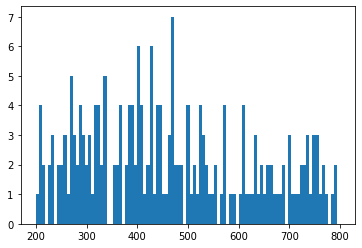

In [4]:
plt.figure()
plt.hist(edge_pos, bins = np.linspace(200, 800,100))

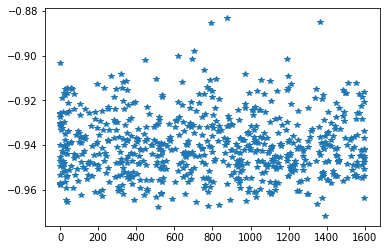

In [148]:
plt.figure()
plt.plot(edge_pos, x_corr_amp,'*')